CHANGE LOG

Developer                                 -----------------                     Date Modified      -------------------    Comments

Anand Chathananickal Sajeevan             -----------------                     July 18 2024       -------------------    Initial Version - Data Loading and Data Exploration

Jobina Joy                                -----------------                     July 18 2024       -------------------    Feature Engineering and Data Preprocessing

In [20]:
import matplotlib.pyplot as plt  # Library for plotting and visualizing data
import numpy as np  # Fundamental package for numerical computations and handling arrays
import os  # Module for interacting with the operating system
import tensorflow as tf  # TensorFlow, a comprehensive open-source platform for machine learning
import tensorflow.keras.layers as tfl  # Keras API for building and training neural networks
from tensorflow.keras.layers import Layer

# Functions for loading and augmenting image datasets
from tensorflow.keras.preprocessing import image_dataset_from_directory  # Load images from a directory and create a dataset
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomContrast  # Layers for random image augmentations
from tensorflow.keras.regularizers import l2  # Apply L2 regularization to layers

# PIL (Python Imaging Library) for image processing
from PIL import ImageEnhance  # Module to enhance images (adjust brightness, contrast, sharpness, color)
from PIL import Image  # Module for opening, manipulating, and saving image files



Loading images from a specified directory.

Automatically inferring labels from subdirectory names.

Shuffling and batching the images.

Resizing images to a consistent size.

Splitting the data into training and validation sets.

Verifying the dataset structure by printing out class names and inspecting a batch of images and labels.

In [21]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
directory = "D:/GROUP6/images/images/"

# Define the training dataset
train_dataset = image_dataset_from_directory(
    directory,
    labels='inferred',  # Automatically infers labels from subdirectory names
    label_mode='categorical',  # Return labels as one-hot encoded vectors
    shuffle=True,  # Shuffle the dataset to ensure random distribution
    batch_size=BATCH_SIZE,  # Number of images to process in a single batch
    image_size=IMG_SIZE,  # Resize all images to 224x224 pixels
    validation_split=0.2,  # Reserve 20% of the data for validation
    subset='training',  # This dataset is for training
    seed=42  # Random seed for reproducibility
)

# Define the validation dataset
validation_dataset = image_dataset_from_directory(
    directory,
    labels='inferred',  # Automatically infers labels from subdirectory names
    label_mode='categorical',  # Return labels as one-hot encoded vectors
    shuffle=True,  # Shuffle the dataset to ensure random distribution
    batch_size=BATCH_SIZE,  # Number of images to process in a single batch
    image_size=IMG_SIZE,  # Resize all images to 224x224 pixels
    validation_split=0.2,  # Reserve 20% of the data for validation
    subset='validation',  # This dataset is for validation
    seed=42  # Random seed for reproducibility
)

Found 15000 files belonging to 30 classes.
Using 12000 files for training.
Found 15000 files belonging to 30 classes.
Using 3000 files for validation.


In [22]:
# Verify the dataset structure
class_names = train_dataset.class_names  # Retrieve the class names inferred from the subdirectory names

# Print each waste class name on a new line
num_classes = len(class_names)
print(f"Number of waste classes: {num_classes}")
print("Waste class names:")
for class_name in class_names:
    print(class_name)

Number of waste classes: 30
Waste class names:
aerosol_cans
aluminum_food_cans
aluminum_soda_cans
cardboard_boxes
cardboard_packaging
clothing
coffee_grounds
disposable_plastic_cutlery
eggshells
food_waste
glass_beverage_bottles
glass_cosmetic_containers
glass_food_jars
magazines
newspaper
office_paper
paper_cups
plastic_cup_lids
plastic_detergent_bottles
plastic_food_containers
plastic_shopping_bags
plastic_soda_bottles
plastic_straws
plastic_trash_bags
plastic_water_bottles
shoes
steel_food_cans
styrofoam_cups
styrofoam_food_containers
tea_bags


In [23]:
# Take one batch of images and labels from the training dataset to inspect
for image_batch, label_batch in train_dataset.take(1):
    print(f"Image batch shape: {image_batch.shape}")  # Print the shape of the image batch
    print(f"Label batch shape: {label_batch.shape}")  # Print the shape of the label batch
    print(f"Labels: {label_batch.numpy()}")  # Convert the label batch to a numpy array and print it

Image batch shape: (32, 224, 224, 3)
Label batch shape: (32, 30)
Labels: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

Exploring the image quality -- checking the low, high and average image quality

Visualizing the class distribution in both traning and validation dataset.

Image Augmentation -- Image augmentation is performed to enhance the training dataset for machine learning models, particularly in the context of computer vision tasks such as image classification, object detection, and segmentation.

RandomFlip -- Helps the model learn invariant features, improving its ability to recognize objects regardless of their orientation.

RandomRotation -- Enhances the model's robustness to rotation variations, making it more effective at recognizing objects in different orientations.

RandomZoom -- Helps the model handle scale variations, which is important for detecting objects of varying sizes in the input images.

RandomContrast -- Improves the model's ability to handle different lighting conditions and contrasts, making it more robust to changes in illumination.

RandomBrightness -- Enhances the model's robustness to lighting variations, ensuring it can accurately recognize objects in different lighting conditions.

RandomSharpness -- Sharpness adjustments can help the model learn to detect edges and fine details more effectively, which is crucial for tasks requiring high precision, such as medical imaging.

RandomNoise -- Noise addition helps the model become more robust to imperfections and noise in real-world data, which can improve generalization.

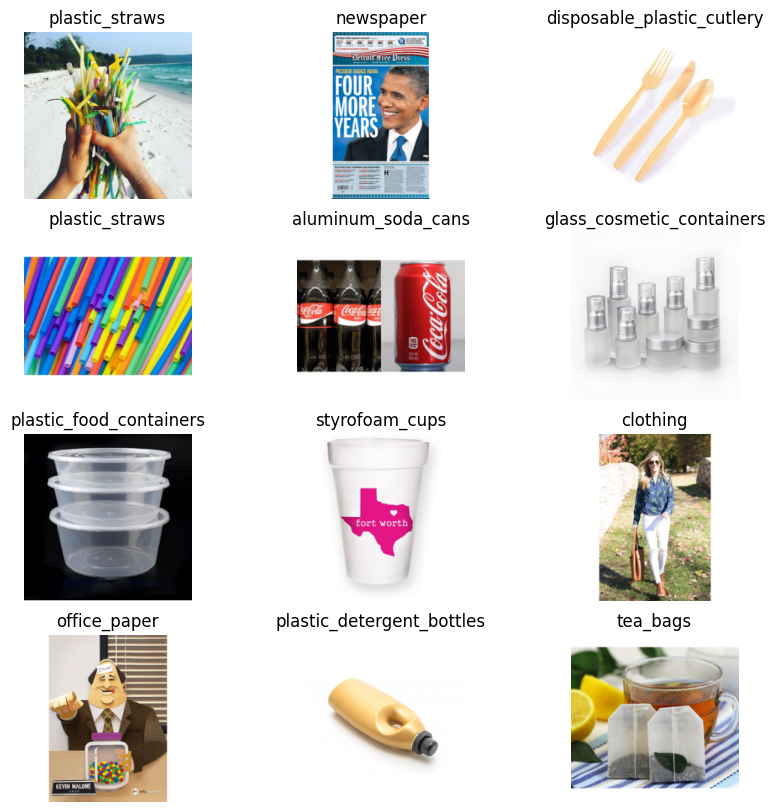

In [24]:
plt.figure(figsize=(10, 10))  # Set the figure size for the plot

# Iterate over the first 2 batches from the training dataset
for images, labels in train_dataset.take(2):
    # Plot 12 images from the current batch
    for i in range(12):
        ax = plt.subplot(4, 3, i + 1)  # Create a subplot in a 4x3 grid
        plt.imshow(images[i].numpy().astype("uint8"))  # Display the image
        label_index = tf.argmax(labels[i]).numpy()  # Get the index of the highest value (class)
        plt.title(class_names[label_index])  # Set the title to the class name
        plt.axis("off")  # Hide the axis

plt.show()  # Display the plot

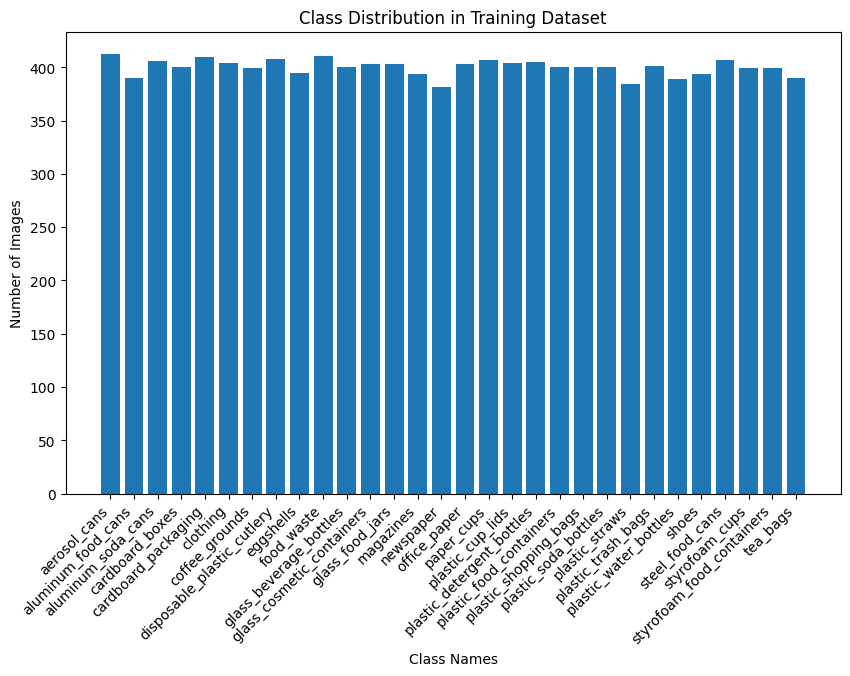

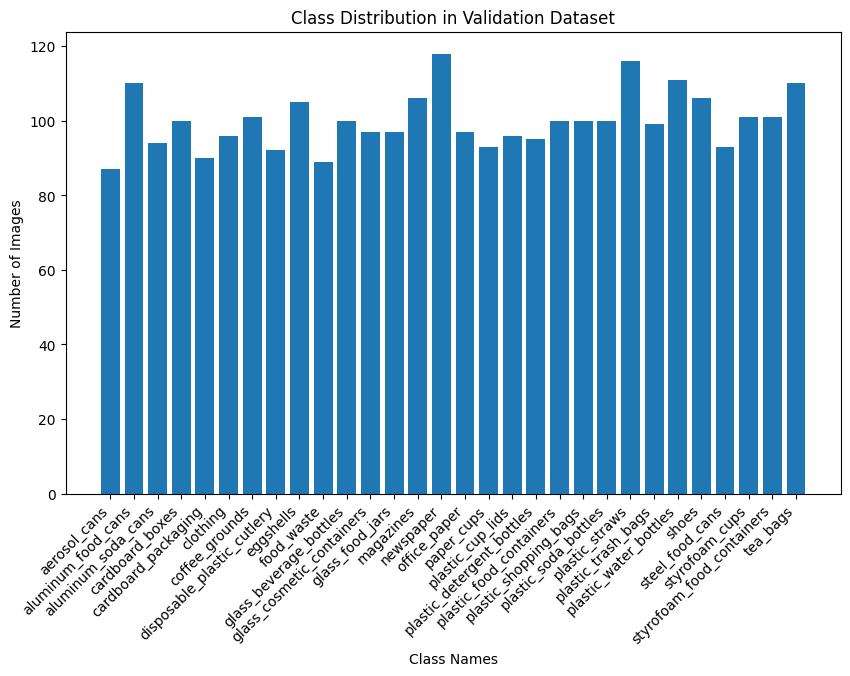

In [25]:
# Check class distribution in the training dataset
class_counts = {class_name: 0 for class_name in class_names}  # Initialize a dictionary to store counts for each class
for _, labels in train_dataset:  # Iterate through batches in the training dataset
    for label in labels:  # Iterate through labels in each batch
        class_index = tf.argmax(label).numpy()  # Get the index of the highest value (class)
        class_name = class_names[class_index]  # Get the class name corresponding to the index
        class_counts[class_name] += 1  # Increment the count for the class

# Plot class distribution for the training dataset
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
plt.bar(class_counts.keys(), class_counts.values())  # Create a bar plot of class counts
plt.xlabel('Class Names')  # Set the label for the x-axis
plt.ylabel('Number of Images')  # Set the label for the y-axis
plt.title('Class Distribution in Training Dataset')  # Set the title of the plot
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.show()  # Display the plot

# Check class distribution in the validation dataset
class_counts = {class_name: 0 for class_name in class_names}  # Reinitialize the dictionary for validation dataset
for _, labels in validation_dataset:  # Iterate through batches in the validation dataset
    for label in labels:  # Iterate through labels in each batch
        class_index = tf.argmax(label).numpy()  # Get the index of the highest value (class)
        class_name = class_names[class_index]  # Get the class name corresponding to the index
        class_counts[class_name] += 1  # Increment the count for the class

# Plot class distribution for the validation dataset
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
plt.bar(class_counts.keys(), class_counts.values())  # Create a bar plot of class counts
plt.xlabel('Class Names')  # Set the label for the x-axis
plt.ylabel('Number of Images')  # Set the label for the y-axis
plt.title('Class Distribution in Validation Dataset')  # Set the title of the plot
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.show()  # Display the plot

In [26]:
# Function to assess image quality for a single image
def assess_image_quality(image):
    # Convert PIL Image to numpy array and then to TensorFlow tensor
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = tf.expand_dims(image, axis=0)  # Add batch dimension

    # Ensure image is in RGB format if required
    if image.shape[-1] != 3:
        image = tf.image.grayscale_to_rgb(image)

    # Apply Sobel edges operation
    edge_image = tf.image.sobel_edges(image)

    # Calculate edge magnitude
    edge_magnitude = tf.sqrt(tf.reduce_sum(tf.square(edge_image), axis=-1))

    # Calculate quality score as the mean edge magnitude
    quality_score = tf.reduce_mean(edge_magnitude).numpy()

    return quality_score

# Function to analyze image quality for a dataset
def image_quality_analysis(dataset):
    quality_scores = []
    for image_batch, _ in dataset:  # Iterate directly over the dataset
        for image in image_batch:
            quality_score = assess_image_quality(image)
            quality_scores.append(quality_score)
    return quality_scores

# Example usage for a single image
image_path = "D:/GROUP6/images/images/aluminum_soda_cans/real_world/Image_194.png"
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))  # Load and resize image
quality_score = assess_image_quality(image)  # Assess quality of a single image
print(f"Single Image Quality Score: {quality_score}")

# Example usage of image_quality_analysis function on a dataset
quality_scores = image_quality_analysis(train_dataset)  # Assess quality of images in the training dataset
print(f"Image Quality Scores: {quality_scores}")


Single Image Quality Score: 87.8055419921875
Image Quality Scores: [66.263695, 83.24972, 51.779842, 29.80759, 37.117226, 96.75719, 75.1731, 17.903606, 67.71219, 118.18105, 92.044846, 38.980114, 13.424099, 61.5328, 107.84754, 53.10049, 18.430998, 40.199497, 62.42415, 98.31922, 67.972755, 45.88738, 20.828115, 38.552723, 50.919098, 52.79038, 68.590935, 60.9468, 40.141838, 51.8904, 41.357502, 29.644333, 87.99941, 69.673615, 55.757587, 93.31561, 97.85099, 57.626015, 27.347704, 16.515514, 140.91284, 75.18798, 116.51313, 46.55589, 82.09086, 52.506126, 63.878147, 58.49907, 55.26826, 36.000145, 107.24796, 34.150517, 71.7144, 110.283905, 20.683153, 57.323044, 118.74907, 60.87627, 43.183296, 20.472214, 28.047009, 44.985775, 30.501564, 14.629079, 95.205086, 91.21129, 46.962944, 72.59493, 39.105827, 9.633267, 89.69039, 64.59685, 50.061375, 22.614231, 20.806395, 41.470703, 49.792854, 56.837074, 17.125261, 21.978645, 82.31432, 85.213745, 25.874598, 42.6399, 59.375645, 119.36405, 60.56569, 39.46074, 8

In [27]:
# Calculate average image quality score
average_quality = np.mean(quality_scores)

# Calculate mean quality score
mean_quality = np.median(quality_scores)

# Calculate low quality score (minimum)
low_quality = np.min(quality_scores)

# Calculate high quality score (maximum)
high_quality = np.max(quality_scores)

print(f"Average Image Quality Score: {average_quality}")
print(f"Mean Quality Score: {mean_quality}")
print(f"Low Quality Score: {low_quality}")
print(f"High Quality Score: {high_quality}")


Average Image Quality Score: 58.97566604614258
Mean Quality Score: 53.7671012878418
Low Quality Score: 2.5435562133789062
High Quality Score: 242.90975952148438


In [28]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

In [29]:
class RandomNoise(Layer):
    def __init__(self, mean=0.0, stddev=0.1, **kwargs):
        super().__init__(**kwargs)
        self.mean = mean
        self.stddev = stddev

    def call(self, inputs, training=True):
        if training:
            noise = tf.random.normal(shape=tf.shape(inputs), mean=self.mean, stddev=self.stddev)
            return inputs + noise
        return inputs

class RandomBrightness(Layer):
    def __init__(self, max_delta=0.2, **kwargs):
        super().__init__(**kwargs)
        self.max_delta = max_delta

    def call(self, inputs, training=True):
        if training:
            return tf.image.random_brightness(inputs, max_delta=self.max_delta)
        return inputs

class RandomSharpness(Layer):
    def __init__(self, alpha=1.5, **kwargs):
        super().__init__(**kwargs)
        self.alpha = alpha

    def call(self, inputs, training=True):
        if training:
            # Apply contrast as a proxy for sharpness adjustment
            inputs = tf.image.random_contrast(inputs, lower=0.5, upper=1.5)
        return inputs

class RandomColorJitter(Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, inputs, training=True):
        if training:
            inputs = tf.image.random_hue(inputs, 0.08)
            inputs = tf.image.random_saturation(inputs, 0.6, 1.6)
            inputs = tf.image.random_brightness(inputs, 0.05)
            inputs = tf.image.random_contrast(inputs, 0.7, 1.3)
        return inputs

class RandomContrast(Layer):
    def __init__(self, contrast_factor=0.2, **kwargs):
        super().__init__(**kwargs)
        self.contrast_factor = contrast_factor

    def call(self, inputs, training=True):
        if training:
            return tf.image.random_contrast(inputs, 1 - self.contrast_factor, 1 + self.contrast_factor)
        return inputs

def data_augmenter():
    data_augmentation = tf.keras.Sequential()
    data_augmentation.add(tf.keras.layers.RandomFlip("horizontal_and_vertical"))
    data_augmentation.add(tf.keras.layers.RandomRotation(0.2))
    data_augmentation.add(tf.keras.layers.RandomZoom(0.2))
    data_augmentation.add(RandomContrast(0.2))
    data_augmentation.add(RandomBrightness(0.2))
    data_augmentation.add(RandomSharpness(alpha=1.5))  # Adjust sharpness using contrast
    data_augmentation.add(RandomNoise(mean=0.0, stddev=0.1))
    
    return data_augmentation


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


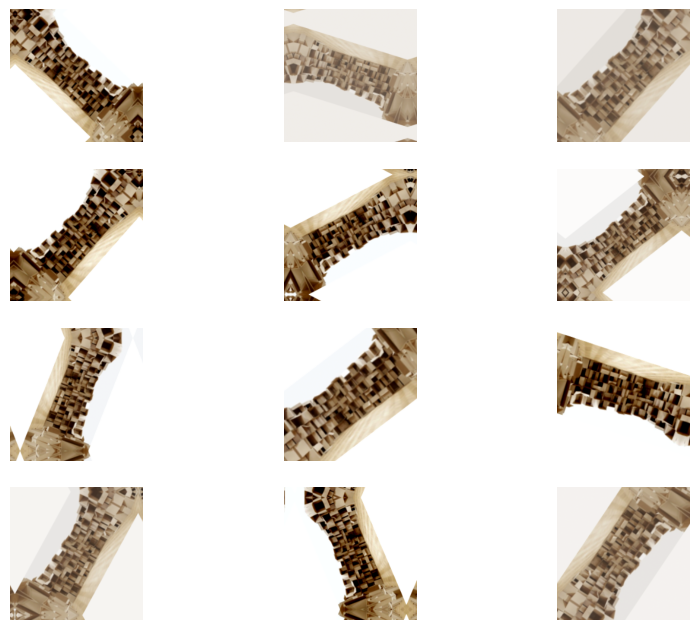

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


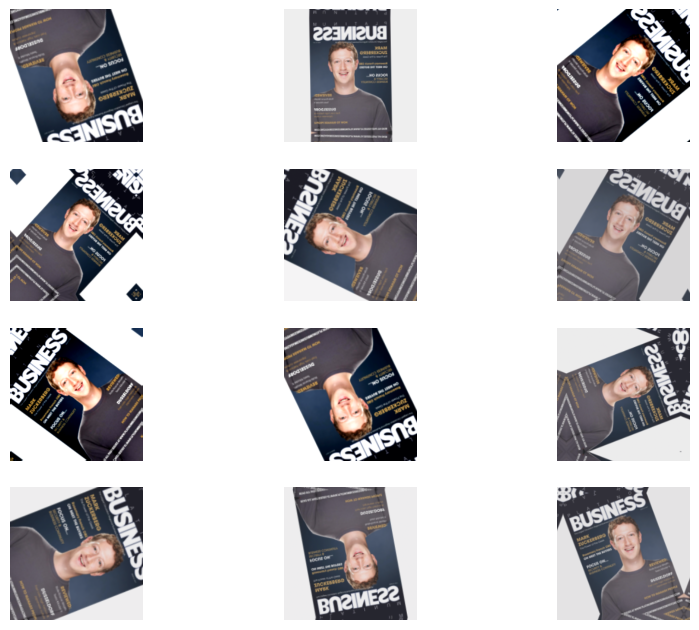

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


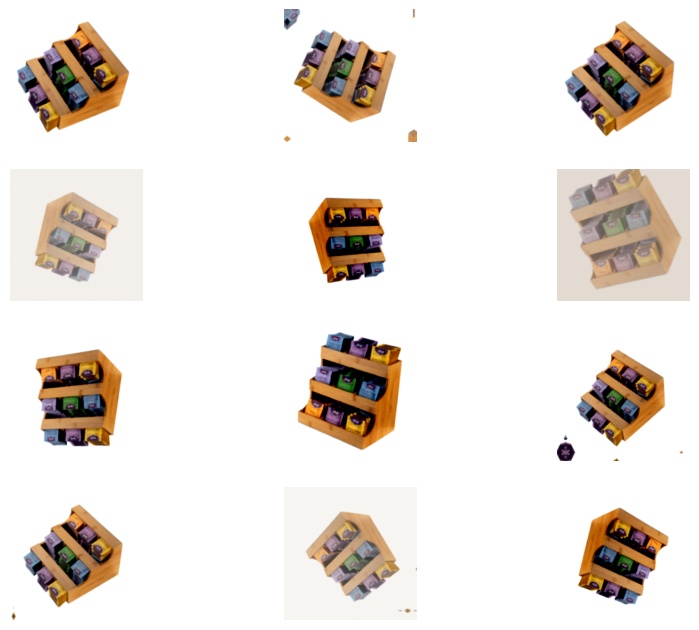

In [30]:
# Create the data augmentation model
data_augmentation = data_augmenter()

# Visualize the augmented images
for image, _ in train_dataset.take(3):  # Take the first 3 batches from the training dataset
    plt.figure(figsize=(10, 10))  # Set the figure size
    first_image = image[0]  # Get the first image from the batch
    for i in range(12):  # Generate 12 augmented images
        ax = plt.subplot(5, 3, i + 1)  # Create a subplot in a 5x3 grid
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))  # Apply augmentation
        plt.imshow(augmented_image[0] / 255)  # Display the augmented image
        plt.axis('off')  # Hide the axis
    plt.show()  # Display the plot

# Define a function to apply augmentation to the dataset
def augment(image, label):
    image = data_augmentation(image)  # Apply data augmentation to the image
    return image, label  # Return the augmented image and the label

# Apply the augmentation function to the training dataset
augmented_train_dataset = train_dataset.map(augment, num_parallel_calls=tf.data.experimental.AUTOTUNE)
